In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: read small_dataframe.csv as a pandas dataframe

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
s0 = pd.read_csv('/content/drive/MyDrive/BooleanSimplification_yongshi/small_test_0_shot.csv')
m0 = pd.read_csv('/content/drive/MyDrive/BooleanSimplification_yongshi/medium_test_0_shot.csv')
l0 = pd.read_csv('/content/drive/MyDrive/BooleanSimplification_yongshi/large_test_0_shot.csv')
s1 = pd.read_csv('/content/drive/MyDrive/BooleanSimplification_yongshi/small_test_1_shot.csv')
s3 = pd.read_csv('/content/drive/MyDrive/BooleanSimplification_yongshi/small_test_3_shot.csv')
s10 = pd.read_csv('/content/drive/MyDrive/BooleanSimplification_yongshi/small_test_10_shot.csv')
s1c = pd.read_csv('/content/drive/MyDrive/BooleanSimplification_yongshi/small_test_1_shot_chain.csv')
s3c = pd.read_csv('/content/drive/MyDrive/BooleanSimplification_yongshi/small_test_3_shot_chain.csv')
s10c = pd.read_csv('/content/drive/MyDrive/BooleanSimplification_yongshi/small_test_10_shot_chain.csv')
#l2df.drop('0', axis=1, inplace=True)

#ldf = pd.read_csv('/content/drive/My Drive/llama-2-7b-boolean-2/large_dataframe.csv')
#ldf.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
# prompt: add a column to sdf titled "Dataset" and set the rows equal to "small"

s0['Dataset'] = 'small'
s0['Shot'] = 0
m0['Dataset'] = 'medium'
l0['Dataset'] = 'large'
s1['Dataset'] = 'small'
s1['Shot'] = 1
s3['Dataset'] = 'small'
s3['Shot'] = 3
s10['Dataset'] = 'small'
s10['Shot'] = 10
s1c['Dataset'] = 'small'
s1c['Shot'] = 1
s3c['Dataset'] = 'small'
s3c['Shot'] = 3
s10c['Dataset'] = 'small'
s10c['Shot'] = 10

In [ ]:
# prompt: combine the sdf, mdf, l1df, l2df, ldf dataframes into a big one. Connect the columns accordingly

df0s = [s0, m0, l0]
big_df = pd.concat(df0s)
small_df = pd.concat([s0, s1, s3, s10])
chain_df = pd.concat([s0, s1c, s3c, s10c])

In [ ]:
big_df

,Index,Prompt,GenOutput,GT,Equivalency,GateDiff,PerfectAcc,Dataset,Shot
0,0,xn = NOT(x1 OR x2),x2),x3|(~x1&~x2),False,4,False,small,0.0
1,1,The simplified boolean expression is: x4 | x7 ...,~x2,~x2|x4|x7,False,2,False,small,0.0
2,2,~(x5|(x5&x3)),~(x5|(x5&x3)),~x5,True,-2,False,small,0.0
3,3,~(x7|(x4|x6)),~(x7|(x4|x6)),~(x4|x6|x7),True,0,False,small,0.0
4,4,The Boolean expression x4&x4 is already simpli...,x4&x4,x4,True,-1,False,small,0.0
...,...,...,...,...,...,...,...,...,...
195,195,~((x2&(x5&x5))|((x5|x1)|((x7|x6)|(x7|x7))))\nA...,x6),~(x1|x5|x6|x7),False,4,False,large,NaN
196,196,~x4 & (~x3 | ~x6) & ~(x3 & (x5 | (x1 & x7))),x7))),(~x3|(~x5&(~x1|~x7)))&((x1&~x4)|(~x3&(~x4|~x6))),False,16,False,large,NaN
197,197,(x6|(x2 & x6 & (x4 | x3))) | (~(x5 | (x2 | x1))),x1))),x6|(~x1&~x2&~x5),False,6,False,large,NaN
198,198,The simplified boolean expression is:\n\nx7 | ...,x5))),x7|(~x2&~x4)|(~x5&~x6&((~x1&~x4)|(~x3&~x7))),False,16,False,large,NaN


In [ ]:
grouped_df = big_df.groupby(['Dataset', 'Equivalency']).size().unstack().fillna(0)
grouped_small = small_df.groupby(['Shot', 'Equivalency']).size().unstack().fillna(0)

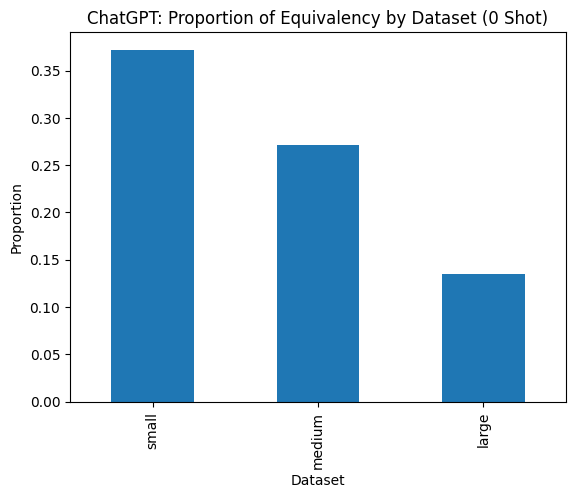

In [ ]:
grouped_df = big_df.groupby(['Dataset', 'Equivalency']).size().unstack().fillna(0)

# Calculating the proportion of equivalency == true / total for each dataset
grouped_df['proportion'] = grouped_df['True'] / (grouped_df['True'] + grouped_df['False'] + grouped_df['Not able to evaluate'])

# Sorting the datasets by the specified order
custom_order = ['small', 'medium', 'large']
grouped_df = grouped_df.reindex(custom_order)

# Plotting the bar chart
grouped_df['proportion'].plot(kind='bar')
plt.title('ChatGPT: Proportion of Equivalency by Dataset (0 Shot)')
plt.ylabel('Proportion')
plt.xlabel('Dataset')
plt.show()

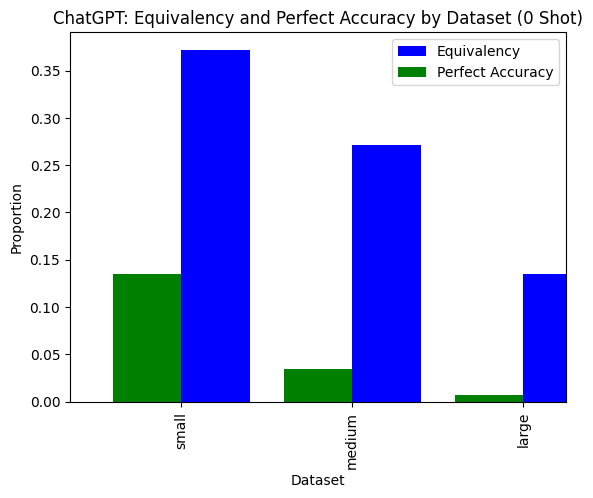

In [ ]:
grouped_df_equivalency = big_df.groupby(['Dataset', 'Equivalency']).size().unstack().fillna(0)

# Calculating the proportion of equivalency == true / total for each dataset
grouped_df_equivalency['proportion'] = grouped_df_equivalency['True'] / (grouped_df_equivalency['True'] + grouped_df_equivalency['False'] + grouped_df_equivalency['Not able to evaluate'])

# Grouping by 'Dataset' and 'PerfectAcc', then unstacking
grouped_df_perfect_acc = big_df.groupby(['Dataset', 'PerfectAcc']).size().unstack().fillna(0)

# Calculating the proportion of perfect accuracy == true / total for each dataset
grouped_df_perfect_acc['proportion'] = grouped_df_perfect_acc[True] / (grouped_df_perfect_acc[True] + grouped_df_perfect_acc[False])

# Sorting the datasets by the specified order
custom_order = ['small', 'medium', 'large']
grouped_df_equivalency = grouped_df_equivalency.reindex(custom_order)
grouped_df_perfect_acc = grouped_df_perfect_acc.reindex(custom_order)

# Plotting the combined bar chart
fig, ax = plt.subplots()
grouped_df_equivalency['proportion'].plot(kind='bar', position=0, width=0.4, ax=ax, color='blue', label='Equivalency')
grouped_df_perfect_acc['proportion'].plot(kind='bar', position=1, width=0.4, ax=ax, color='green', label='Perfect Accuracy')

plt.title('ChatGPT: Equivalency and Perfect Accuracy by Dataset (0 Shot)')
plt.ylabel('Proportion')
plt.xlabel('Dataset')
plt.legend()
plt.show()

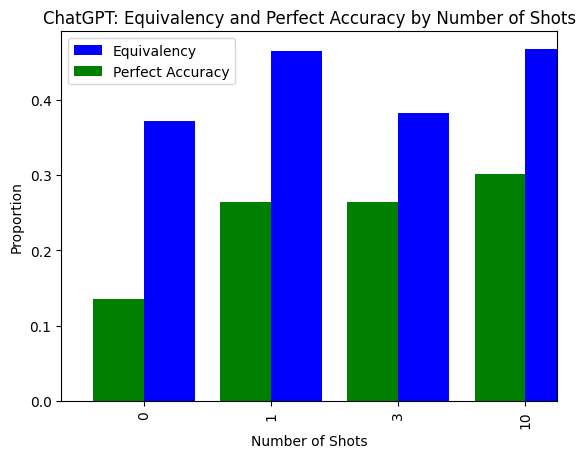

In [ ]:
grouped_small_equivalency = small_df.groupby(['Shot', 'Equivalency']).size().unstack().fillna(0)
grouped_small_perfect_acc = small_df.groupby(['Shot', 'PerfectAcc']).size().unstack().fillna(0)
grouped_small_perfect_acc['proportion'] = grouped_small_perfect_acc[True] / (grouped_small_perfect_acc[True] + grouped_small_perfect_acc[False])
#grouped_small_equivalency['proportion'] = (grouped_small_equivalency['True'] + grouped_small_equivalency[True]) / (grouped_small_equivalency['True'] + grouped_small_equivalency[True] + grouped_small_equivalency['False'] + grouped_small_equivalency[False] + grouped_small_equivalency['Not able to evaluate'])
grouped_small_equivalency['proportion'] = (grouped_small_equivalency['True']) / (grouped_small_equivalency['True'] + grouped_small_equivalency['False'] + grouped_small_equivalency['Not able to evaluate'])

custom_order = ['0 Shot', '1 Shot', '3 Shots', '10 Shots']
grouped_small_equivalency = grouped_small_equivalency.reset_index()
grouped_small_perfect_acc = grouped_small_perfect_acc.reset_index()
fig, ax = plt.subplots()
grouped_small_equivalency.plot(x='Shot', y='proportion', kind='bar', position=0, width=0.4, ax=ax, color='blue', label='Equivalency')
grouped_small_perfect_acc.plot(x='Shot', y='proportion', kind='bar', position=1, width=0.4, ax=ax, color='green', label='Perfect Accuracy')

plt.title('ChatGPT: Equivalency and Perfect Accuracy by Number of Shots')
plt.ylabel('Proportion')
plt.xlabel('Number of Shots')
plt.legend()
plt.show()

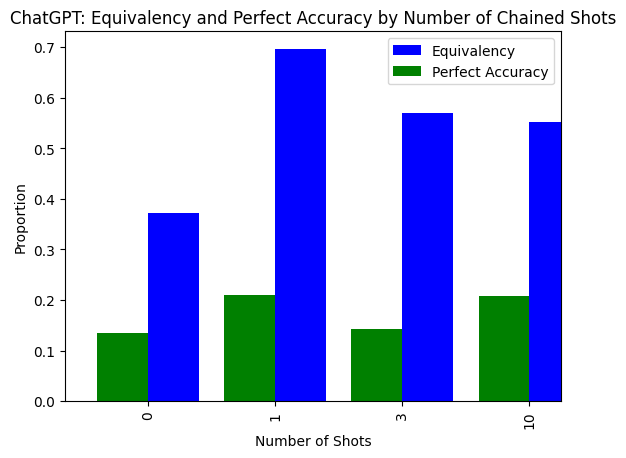

In [45]:
grouped_chain_equivalency = chain_df.groupby(['Shot', 'Equivalency']).size().unstack().fillna(0)
grouped_chain_perfect_acc = chain_df.groupby(['Shot', 'PerfectAcc']).size().unstack().fillna(0)
grouped_chain_perfect_acc['proportion'] = grouped_chain_perfect_acc[True] / (grouped_chain_perfect_acc[True] + grouped_chain_perfect_acc[False])
#grouped_chain_equivalency['proportion'] = (grouped_chain_equivalency['True'] + grouped_chain_equivalency[True]) / (grouped_chain_equivalency['True'] + grouped_chain_equivalency[True] + grouped_chain_equivalency['False'] + grouped_chain_equivalency[False] + grouped_chain_equivalency['Not able to evaluate'])
grouped_chain_equivalency['proportion'] = (grouped_chain_equivalency['True']) / (grouped_chain_equivalency['True'] + grouped_chain_equivalency['False'] + grouped_chain_equivalency['Not able to evaluate'])

custom_order = ['0 Shot', '1 Shot', '3 Shots', '10 Shots']
grouped_chain_equivalency = grouped_chain_equivalency.reset_index()
grouped_chain_perfect_acc = grouped_chain_perfect_acc.reset_index()
fig, ax = plt.subplots()
grouped_chain_equivalency.plot(x='Shot', y='proportion', kind='bar', position=0, width=0.4, ax=ax, color='blue', label='Equivalency')
grouped_chain_perfect_acc.plot(x='Shot', y='proportion', kind='bar', position=1, width=0.4, ax=ax, color='green', label='Perfect Accuracy')

plt.title('ChatGPT: Equivalency and Perfect Accuracy by Number of Chained Shots')
plt.ylabel('Proportion')
plt.xlabel('Number of Shots')
plt.legend()
plt.show()

In [ ]:
datasets = [s0, m0, l0]
ds_size = ['small', 'medium', 'large']
df = big_df

df_filtered = df[df['Equivalency'] == 'False']
df_filtered

,Index,Prompt,GenOutput,GT,Equivalency,GateDiff,PerfectAcc,Dataset,Shot,Equivalency.1,GateDiff.1,PerfectAcc.1
0,0,x3 | (~(x1 | x2)),x2)),x3|(~x1&~x2),False,4,False,small,0.0,NaN,NaN,NaN
1,1,x4 | (x7 | ~x2),~x2),~x2|x4|x7,False,2,False,small,0.0,NaN,NaN,NaN
6,6,The simplified boolean expression for ~(x7|x7)...,0,~x7,False,1,False,small,0.0,NaN,NaN,NaN
7,7,~x2|x(~x4&~x6),~x2|x(~x4&~x6),~(x2|x4|x6),False,-2,False,small,0.0,NaN,NaN,NaN
8,8,"~(x7|(x7|x6)) \n\nTo simplify this expression,...",x7,~(x6|x7),False,2,False,small,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
992,992,(~(x7|(x5&x6)))|(x6&(~(x6|(x3|x4)))),(~(x7|(x5&x6)))|(x6&(~(x6|(x3|x4)))),(~x3&~x4&~x6)|(~x5&x6&~x7),False,2,False,large,NaN,False,2.0,False
993,993,The simplified boolean expression is:\n\n~(x4 ...,x3)))))),~(x4&(x3|(x4&x6))),False,4,False,large,NaN,False,4.0,False
995,995,~x5 & (~(((x4 & x2) | (x7 | x5)) | (x1 | (x6 |...,x7))),~x1&~x5&~x6&~x7&(~x2|~x4),False,11,False,large,NaN,False,11.0,False
997,997,The simplified boolean expression is:\nx4 | ~(...,x1)),~x1|x4|~x6|~x7,False,6,False,large,NaN,False,6.0,False


Text(0, 0.5, 'Count')

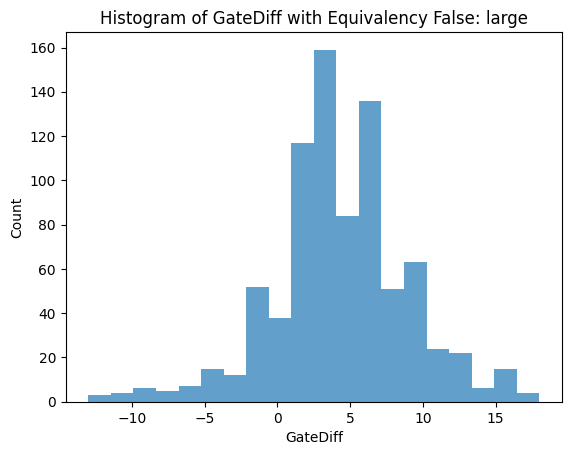

In [ ]:
subset = df_filtered[df_filtered['Dataset'] == 'large']
plt.hist(subset['GateDiff'], bins=20, alpha=0.7)
plt.title(f'Histogram of GateDiff with Equivalency False: large')
plt.xlabel('GateDiff')
plt.ylabel('Count')


<Figure size 1200x1000 with 0 Axes>

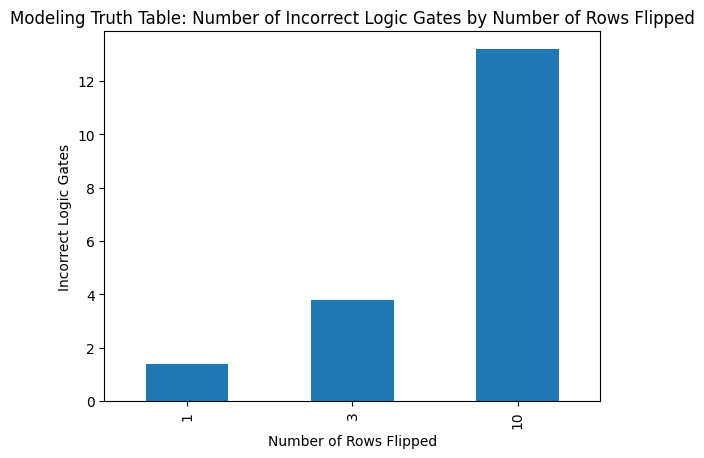

In [ ]:
row_flip = np.array([1, 3, 10])
wrong_logic_gate = np.array([1.4, 3.8, 13.2])

dic = {'row_flip':row_flip, 'wrong_logic_gate':wrong_logic_gate}
df_ = pd.DataFrame(data=dic)
plt.figure(figsize=(12, 10))

df_.plot(x='row_flip', y='wrong_logic_gate', kind='bar', legend=False)
plt.title('Modeling Truth Table: Number of Incorrect Logic Gates by Number of Rows Flipped')
plt.xlabel('Number of Rows Flipped')
plt.ylabel('Incorrect Logic Gates')

plt.show()

<ipython-input-12-848946a3e13a>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  subset = df_filtered[df_filtered['Dataset'] == dataset]
<ipython-input-12-848946a3e13a>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  subset = df_filtered[df_filtered['Dataset'] == dataset]
<ipython-input-12-848946a3e13a>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  subset = df_filtered[df_filtered['Dataset'] == dataset]
<ipython-input-12-848946a3e13a>:17: UserWarning: Tight layout not a

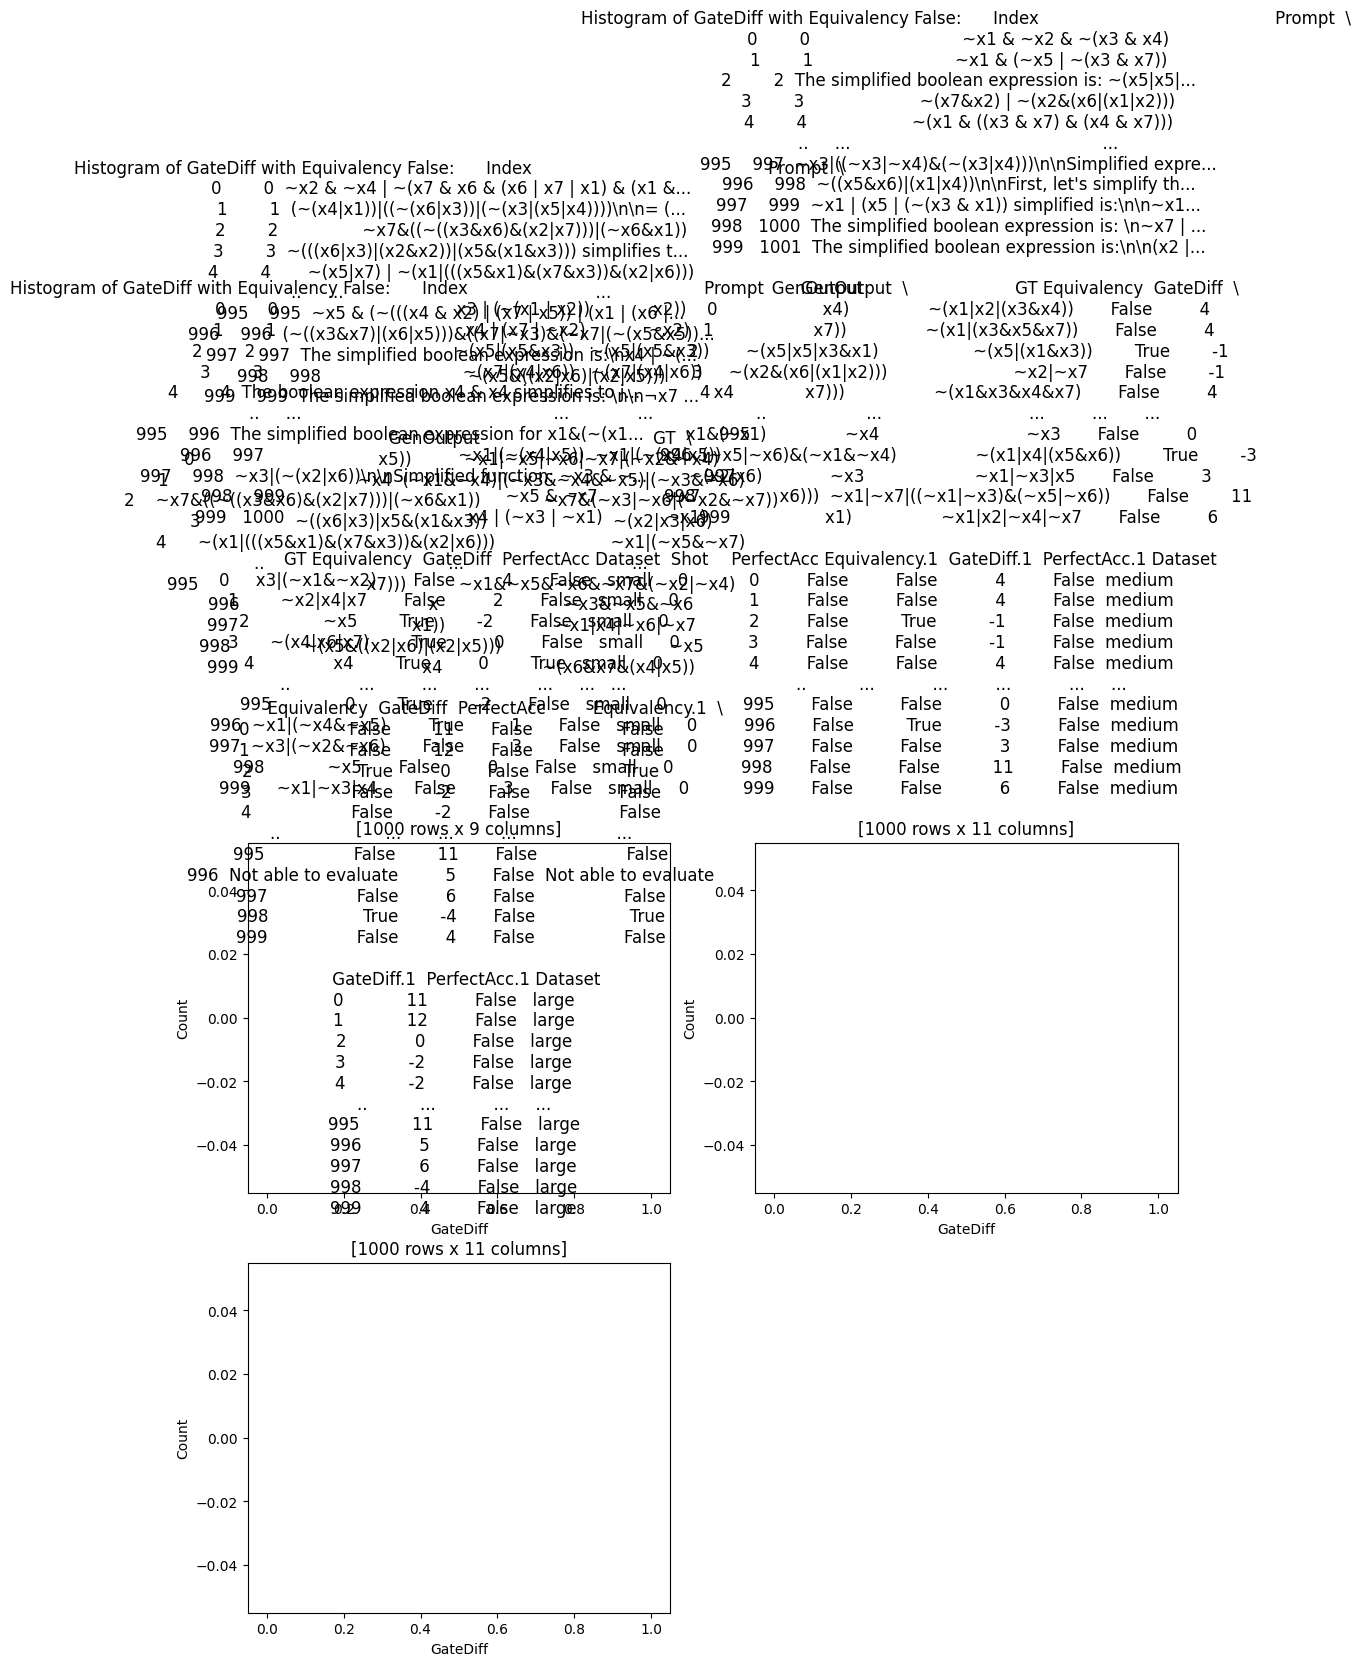

In [ ]:
df = big_df

df_filtered = df[df['Equivalency'] == False]

# Creating a grid of 4 histograms for the filtered data, one for each dataset
plt.figure(figsize=(12, 10))

# Reusing the list of datasets
for i, dataset in enumerate(datasets, 1):
    plt.subplot(2, 2, i)
    subset = df_filtered[df_filtered['Dataset'] == dataset]
    plt.hist(subset['GateDiff'], bins=20, alpha=0.7)
    plt.title(f'Histogram of GateDiff with Equivalency False: {dataset}')
    plt.xlabel('GateDiff')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
big_df

<ipython-input-85-2dcbb218e94a>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  proportion_data = grouped['Equivalency', 'PerfectAcc'].mean().reset_index()


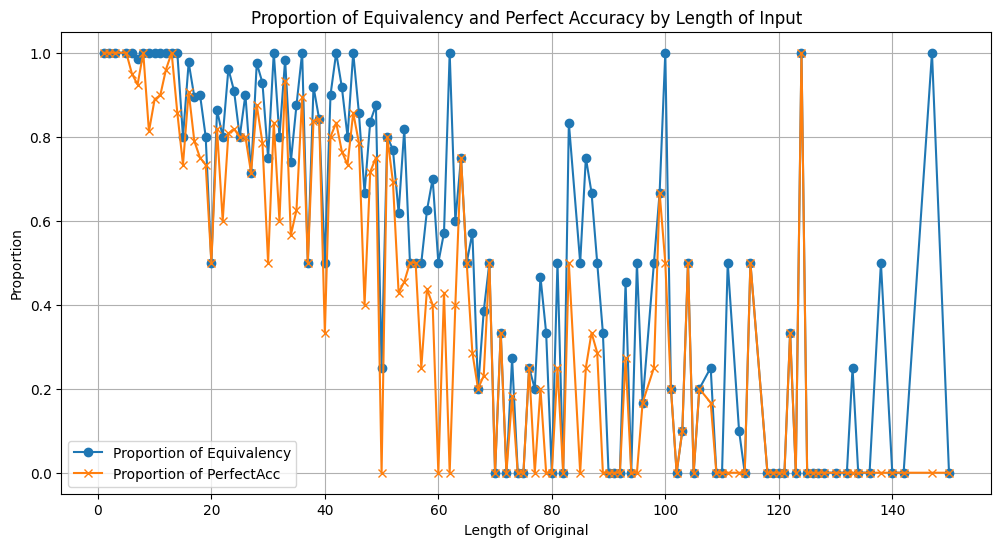

In [ ]:
df['Original_Length'] = df['Original'].apply(lambda x: len(str(x)))

# Grouping by 'Original_Length'
grouped = df.groupby('Original_Length')

# Calculating the proportion of equivalency == true / total and perfectAcc == true / total for each length
proportion_data = grouped['Equivalency', 'PerfectAcc'].mean().reset_index()

# Plotting the line plot
plt.figure(figsize=(12, 6))

plt.plot(proportion_data['Original_Length'], proportion_data['Equivalency'], label='Proportion of Equivalency', marker='o')
plt.plot(proportion_data['Original_Length'], proportion_data['PerfectAcc'], label='Proportion of PerfectAcc', marker='x')

plt.title('Proportion of Equivalency and Perfect Accuracy by Length of Input')
plt.xlabel('Length of Original')
plt.ylabel('Proportion')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-91-e63521eb08f2>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  proportion_data = grouped['Equivalency', 'PerfectAcc'].mean().reset_index()


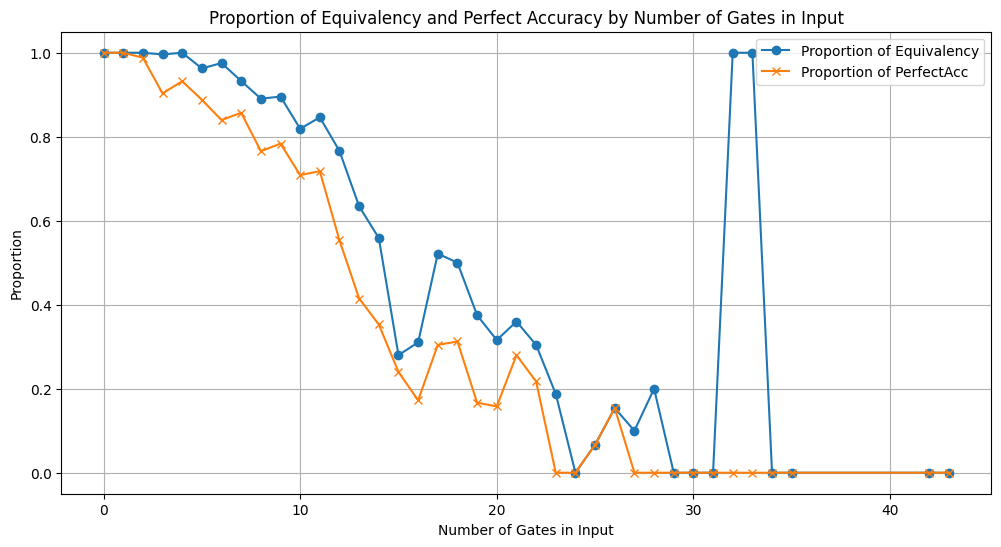

In [ ]:
df['Original_Gates'] = df['Original'].apply(count_logic_gates)

# Grouping by 'Original_Length'
grouped = df.groupby('Original_Gates')

# Calculating the proportion of equivalency == true / total and perfectAcc == true / total for each length
proportion_data = grouped['Equivalency', 'PerfectAcc'].mean().reset_index()

# Plotting the line plot
plt.figure(figsize=(12, 6))

plt.plot(proportion_data['Original_Gates'], proportion_data['Equivalency'], label='Proportion of Equivalency', marker='o')
plt.plot(proportion_data['Original_Gates'], proportion_data['PerfectAcc'], label='Proportion of PerfectAcc', marker='x')

plt.title('Proportion of Equivalency and Perfect Accuracy by Number of Gates in Input')
plt.xlabel('Number of Gates in Input')
plt.ylabel('Proportion')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import re
def count_logic_gates(exp):
    # AND, OR, NOT gates
    gates = re.findall("&|\||\~", exp)

    return len(gates)

In [ ]:
# prompt: read finetuning_data3.json
import json

with open('finetuning_data3.json') as f:
    data = json.load(f)


In [ ]:
data[0:5]

[{'text': '<s>[INST] Take a deep breath and simplify the following boolean expression: ~(x1|(x4&(x2&x3))). Output just simplified function. [/INST] ~(x1|(x2&x3&x4))</s>'},
 {'text': '<s>[INST] Take a deep breath and simplify the following boolean expression: ~((x2|x2)&(x5|(x5&x1))). Output just simplified function. [/INST] ~(x2&x5)</s>'},
 {'text': '<s>[INST] Take a deep breath and simplify the following boolean expression: ~x5&((~(x5|x4))|(~(x4&x3))). Output just simplified function. [/INST] ~x5&(~x3|~x4)</s>'},
 {'text': '<s>[INST] Take a deep breath and simplify the following boolean expression: x2|(~(x2&x4)). Output just simplified function. [/INST] 1</s>'},
 {'text': '<s>[INST] Take a deep breath and simplify the following boolean expression: ~(x2&((x3&x2)&(x4|x2))). Output just simplified function. [/INST] ~(x2&x3)</s>'}]

In [ ]:
strings = []
for i in data:
  strings.append(i["text"])

In [ ]:
a = strings[:6]

In [ ]:
regex = r"expression:\s*(.*?)\.\s*Output.*?\[/INST\]\s*(.*?)</s>"

# Extracting the boolean functions using the regex
extracted_functions = [re.findall(regex, s) for s in strings]

# Formatting the output
formatted_output = [[match[0], match[1]] for sublist in extracted_functions for match in sublist]

formatted_output


In [ ]:
extracted_functions

[]

In [ ]:
# prompt: turn formatted_output into a dataframe where the column on the left is input and the right is output

df = pd.DataFrame(formatted_output, columns=['Input', 'Output'])


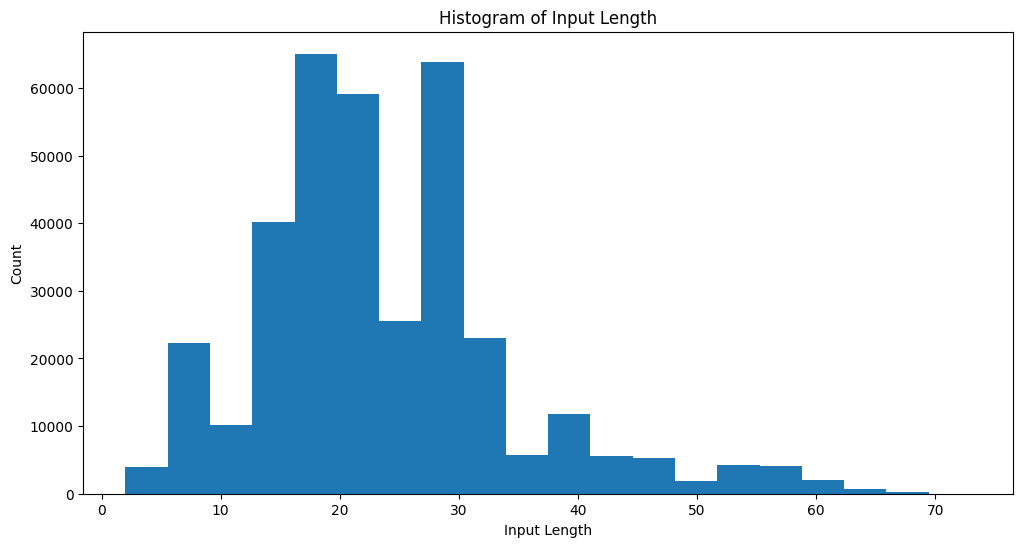

In [ ]:
# prompt: plot a histogram of the len(input)

df['Input_Length'] = df['Input'].apply(lambda x: len(str(x)))

# Plotting the histogram
plt.figure(figsize=(12, 6))

plt.hist(df['Input_Length'], bins=20)
plt.title('Histogram of Input Length')
plt.xlabel('Input Length')
plt.ylabel('Count')
plt.show()


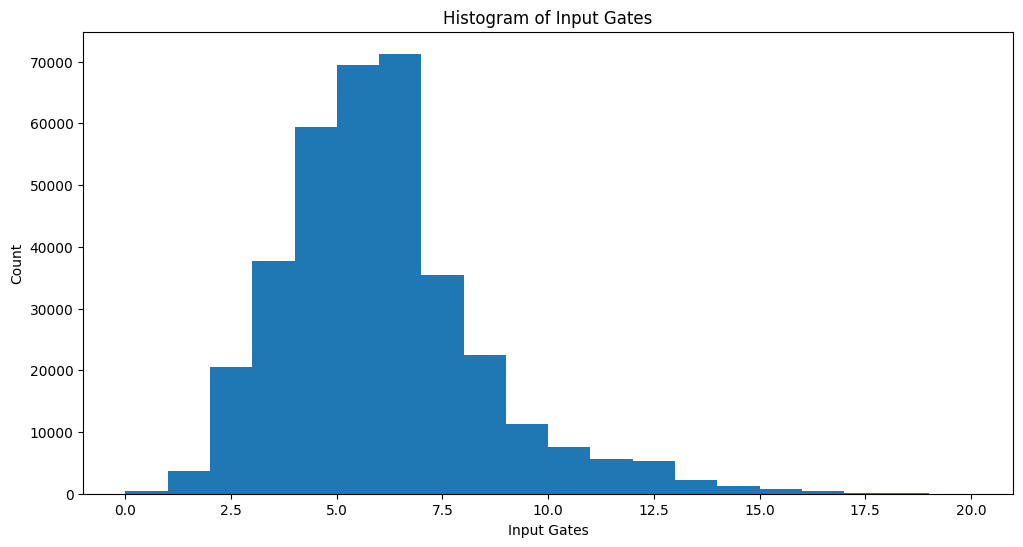

In [ ]:


# prompt: plot a histogram of the len(input)

df['Input_Gates'] = df['Input'].apply(count_logic_gates)

# Plotting the histogram
plt.figure(figsize=(12, 6))

plt.hist(df['Input_Gates'], bins=20)
plt.title('Histogram of Input Gates')
plt.xlabel('Input Gates')
plt.ylabel('Count')
plt.show()


In [ ]:
# prompt: check if there is a duplicate in "input" column

df['Input'].duplicated().value_counts()


False    246804
True     108196
Name: Input, dtype: int64